# Clustering
This is an *unsupervised method*. You tell the computer to create groups without giving it labels. Useful in recommendation systems, cohort grouping, determining supervised learning labels and features.

In [1]:
%matplotlib inline
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.cluster import hierarchy
from sklearn import cluster, datasets, metrics

## K-Means Clustering

Process:

* Choose number of clusters (K)
* Randomly assign K observations as the *centroids*
* For remaining observations, determine which centroid it is closest to
* Determine new centroid for each cluster
* Reassign if necessary/repeat X times

In [2]:
iris = datasets.load_iris()
print(iris.DESCR)

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [3]:
dir(iris)

['DESCR', 'data', 'feature_names', 'target', 'target_names']

In [4]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [48]:
target = pd.Series(iris.target)
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['target'] = target
X = iris_df

In [40]:
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


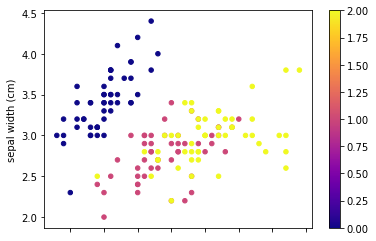

In [41]:
#Actuals
X.plot(kind='scatter', x='sepal length (cm)', y='sepal width (cm)',
          c=target, cmap='plasma')

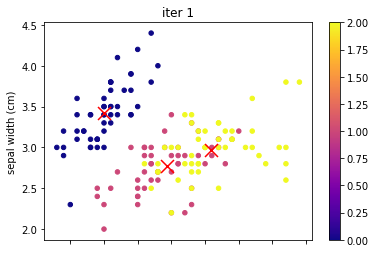

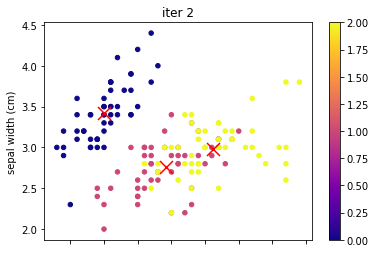

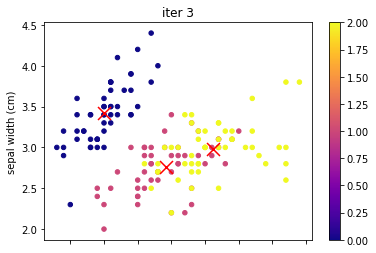

In [50]:
# Plot 3 iterations
for i in range(1, 4):
    # using default init (k-means++) gives better starting points
    k = cluster.KMeans(n_clusters=3, max_iter=i, init='random', random_state=50)
    pred = k.fit_predict(X)
    X.plot(title=f'iter {i}', kind='scatter', x='sepal length (cm)', y='sepal width (cm)',
          c=pred, cmap='plasma')
    centroids = k.cluster_centers_
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=169, linewidths=3,
                color='r', zorder=10)


## Exercise: Run K-Means

The (wheat) seed dataset has a feature engineered column, compactness
\begin{align}
C=4*pi*area/perimeter^2
\end{align}

* Run K-means with 3 clusters on this data set. (Ignore variety)
* Scatter plot the result.

The file is at ``../data/seeds_dataset.txt``


It has the following fields:

1. area A, 
2. perimeter P, 
3. compactness C = 4*pi*A/P^2, 
4. length of kernel, 
5. width of kernel, 
6. asymmetry coefficient 
7. length of kernel groove. 
8. variety (Kama, Rosa, Canadian)

https://archive.ics.uci.edu/ml/datasets/seeds


In [12]:
seeds = pd.read_table('../data/seeds_dataset.txt', sep=r'\s+',
     names='area,per,comp,len,wid,asym,groove,variety'.split(","))

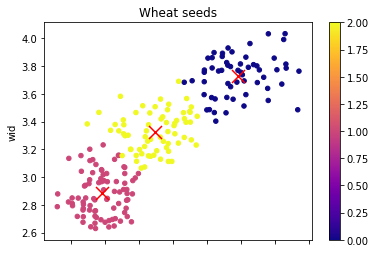

In [14]:
# Cluster just with length and width
seed_X = seeds[['len', 'wid']]
# Crate 3 clusters
seed_kmean = cluster.KMeans(n_clusters=3)
# Fit & predict the clusters
seed_pred = seed_kmean.fit_predict(seed_X)
seed_X.plot(title=f'Wheat seeds', kind='scatter', x='len', y='wid',
          c=seed_pred, cmap='plasma')
seed_centroids = seed_kmean.cluster_centers_
plt.scatter(seed_centroids[:, 0], seed_centroids[:, 1],
                marker='x', s=169, linewidths=3,
                color='r', zorder=10)

In [15]:
seed_pred

array([2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 1, 2, 2, 1, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 0, 2, 2, 1, 1, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1,
       2, 2, 2, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0,
       2, 2, 2, 2, 0, 2, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

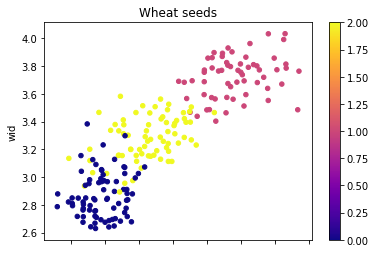

In [17]:
# Cluster using all data
seed_X = seeds.iloc[:, :-1]
seed_kmean = cluster.KMeans(n_clusters=3)
seed_pred = seed_kmean.fit_predict(seed_X)
seed_X.plot(title=f'Wheat seeds', kind='scatter', x='len', y='wid',
          c=seed_pred, cmap='plasma')
# centroids are way off if we plot them
#seed_centroids = seed_kmean.cluster_centers_
#plt.scatter(seed_centroids[:, 0], seed_centroids[:, 1],
#                marker='x', s=169, linewidths=3,
#                color='r', zorder=10)

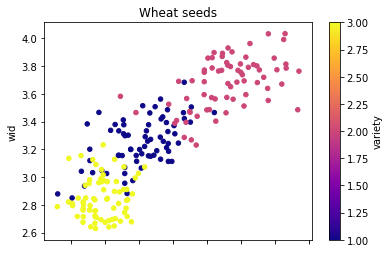

In [18]:
# Actual variety using all data
seeds.plot(title=f'Wheat seeds', kind='scatter', x='len', y='wid',
          c='variety', cmap='plasma')


## How Many Clusters?
We can calculate the *WCSS*, within cluster sum of squares, for a variety of K sizes. This value starts off large. As K approaches the number of observations, this value goes to 0.
At some point there might be an "elbow". Around that elbow can be minimum number of clusters.

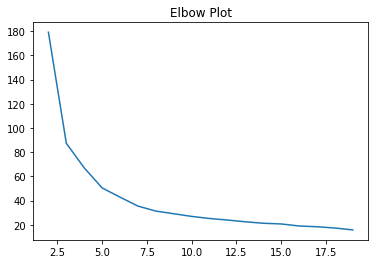

In [51]:
def plot_elbow(data, k_candidates, fig_opts=None):
    inertias = []
    for k in k_candidates:
        kmeans = cluster.KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X)
        inertias.append(kmeans.inertia_)
    fig_opts = fig_opts or {}
    fig = plt.figure(**fig_opts)
    plt.plot(k_candidates, inertias)
    plt.title('Elbow Plot')
plot_elbow(X, range(2, 20))

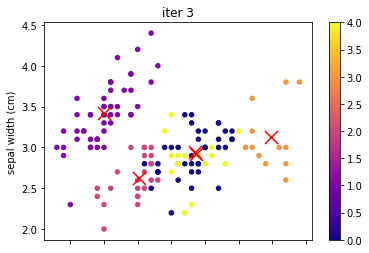

In [52]:
k = cluster.KMeans(n_clusters=5, random_state=50)
pred = k.fit_predict(X)
X.plot(title=f'iter {i}', kind='scatter', x='sepal length (cm)',
       y='sepal width (cm)',
      c=pred, cmap='plasma')
centroids = k.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='r', zorder=10)

## Exercise: Elbow Curve
* Run an elbow curve on the seed data. Is there an elbow?

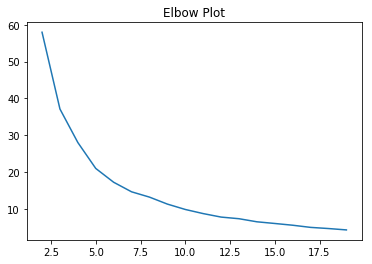

In [21]:
plot_elbow(seed_X, range(2, 20))

## Cluster size with Silhoutte Analysis
http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html


In [53]:
def silhoutte_analysis(X, range_n_clusters):
    if isinstance(X, pd.DataFrame):
        X = X.values
    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        clusterer = cluster.KMeans(n_clusters=n_clusters, random_state=10)
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = metrics.silhouette_score(X, cluster_labels)
        print("For n_clusters =", n_clusters,
              "The average silhouette_score is :", silhouette_avg)

        # Compute the silhouette scores for each sample
        sample_silhouette_values = metrics.silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = \
                sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                    c=colors, edgecolor='k')

        # Labeling the clusters
        centers = clusterer.cluster_centers_
        # Draw white circles at cluster centers
        ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                    c="white", alpha=1, s=200, edgecolor='k')

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                        s=50, edgecolor='k')

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                      "with n_clusters = %d" % n_clusters),
                     fontsize=14, fontweight='bold')

        plt.show()
        


For n_clusters = 2 The average silhouette_score is : 0.6798027978812322


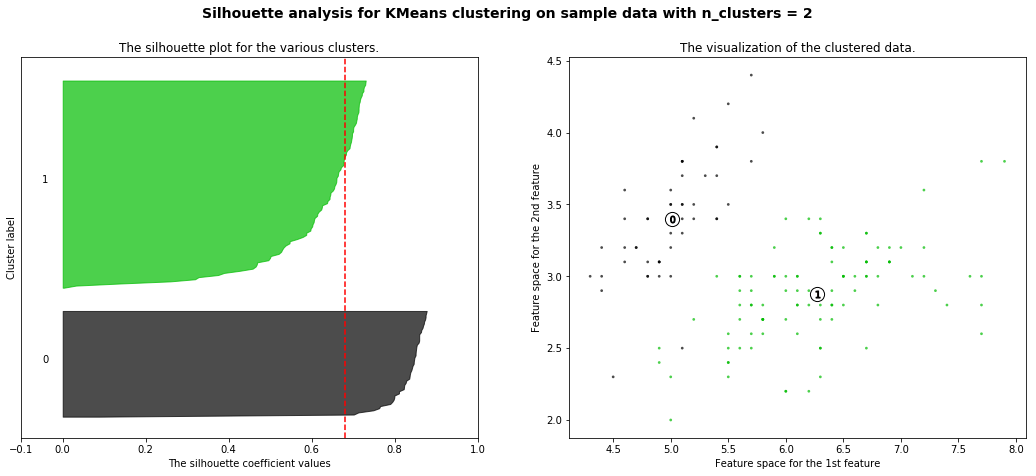

For n_clusters = 3 The average silhouette_score is : 0.5816937070990904


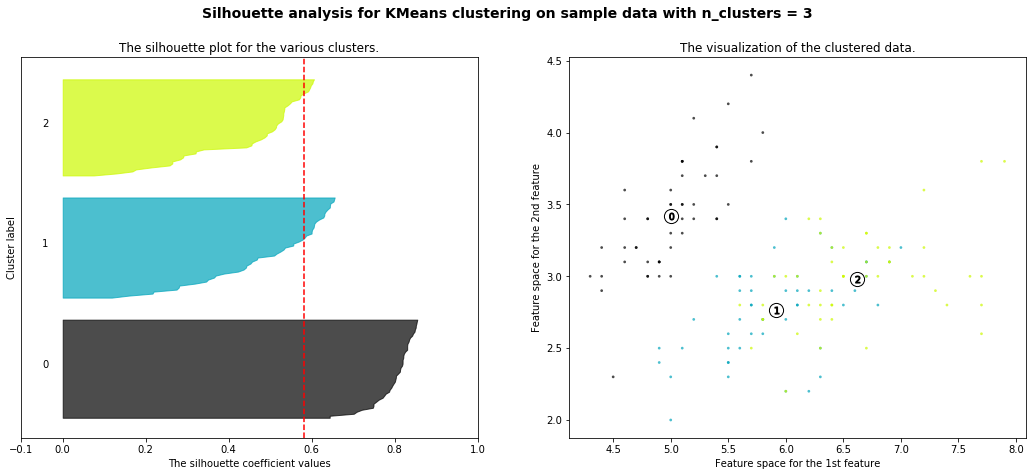

For n_clusters = 4 The average silhouette_score is : 0.5476040150107042


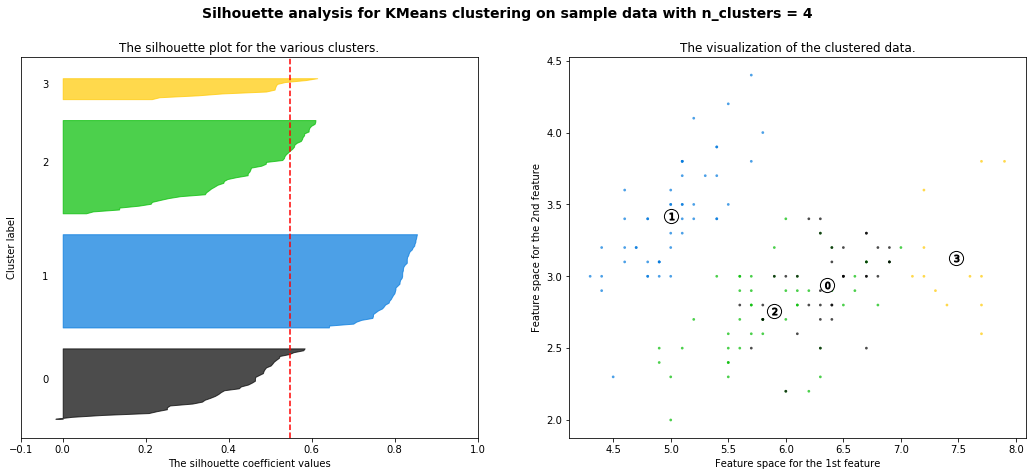

For n_clusters = 5 The average silhouette_score is : 0.5231137763486624


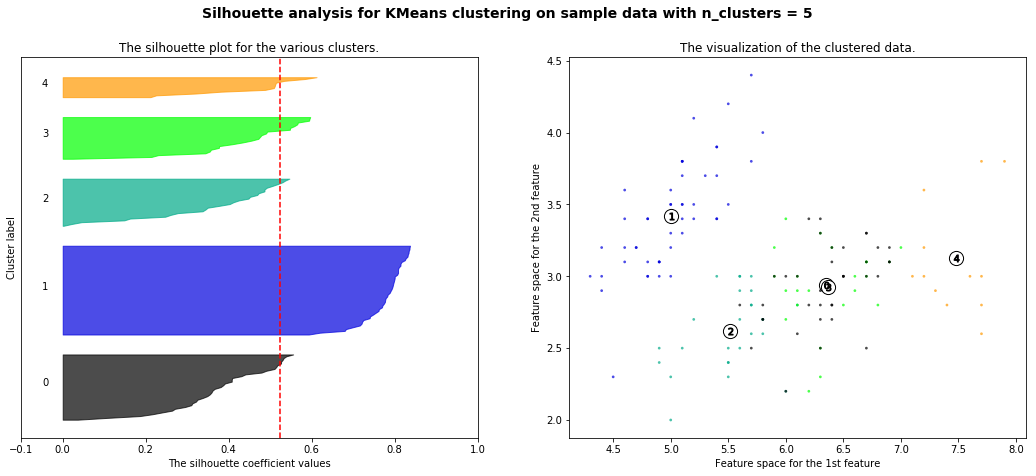

For n_clusters = 6 The average silhouette_score is : 0.3967348232035194


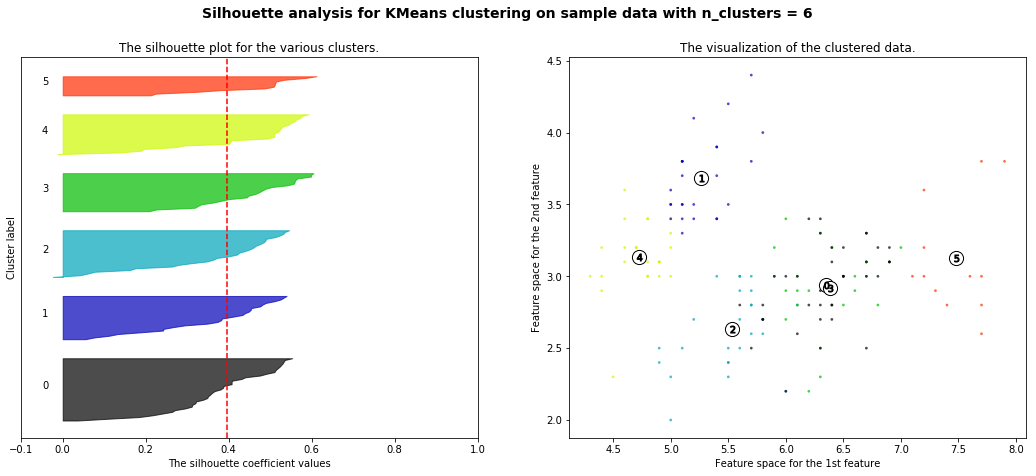

For n_clusters = 7 The average silhouette_score is : 0.3872476436648937


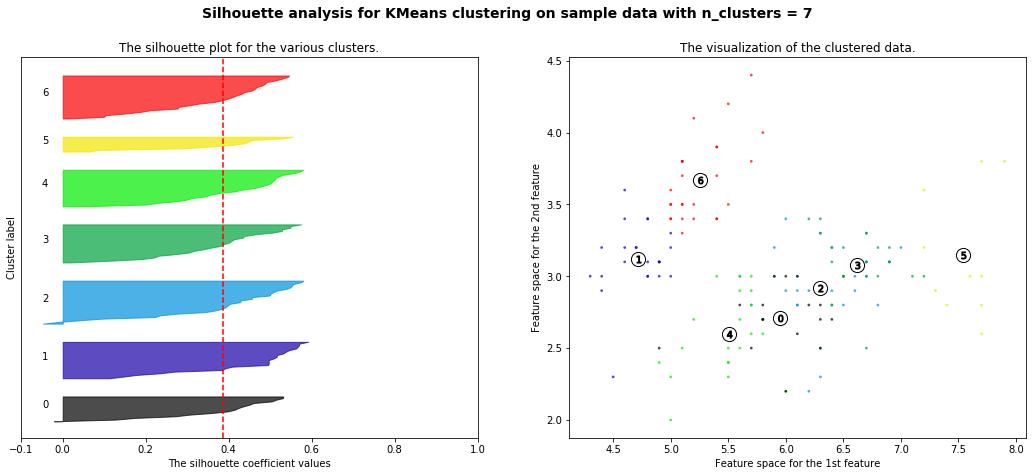

For n_clusters = 8 The average silhouette_score is : 0.3834165757077856


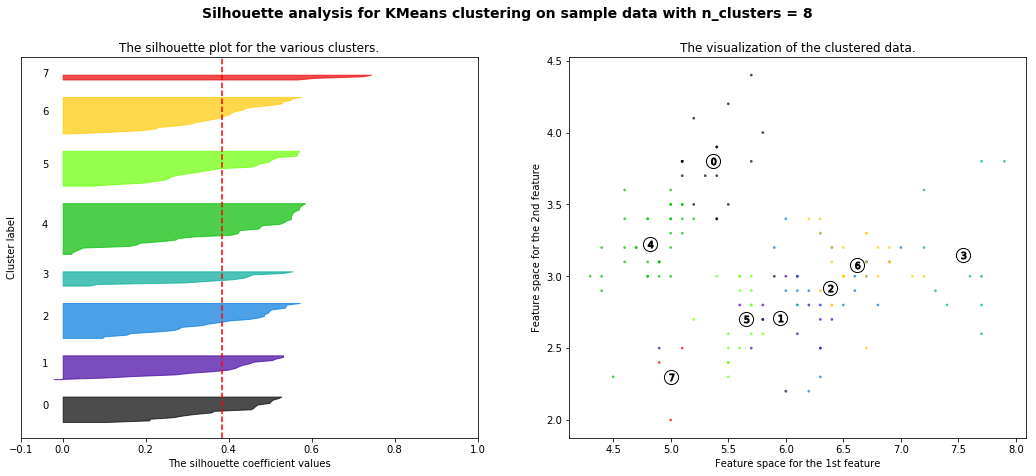

For n_clusters = 9 The average silhouette_score is : 0.3414218108125156


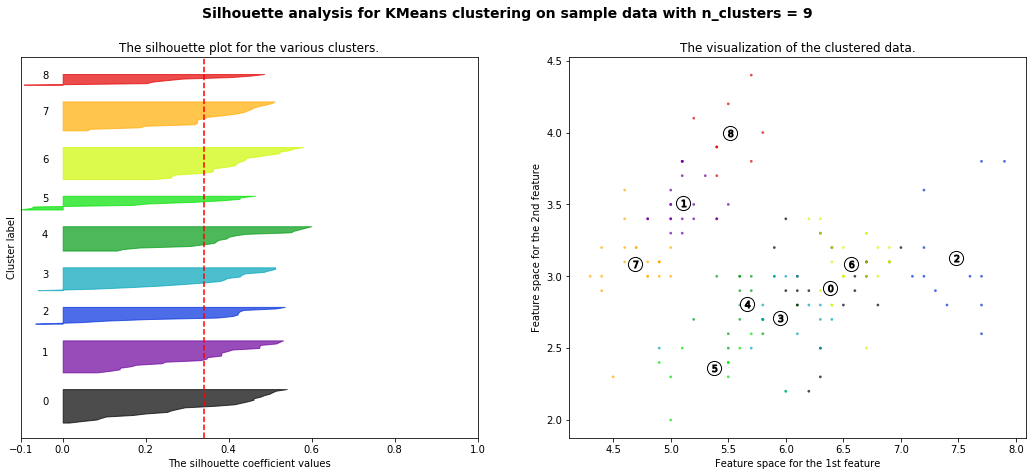

In [54]:
silhoutte_analysis(X, range(2, 10))        

## Exercise: Siloutte Anaylsis

* Run Silouette Analysis on the seed data

For n_clusters = 2 The average silhouette_score is : 0.5182873410849097


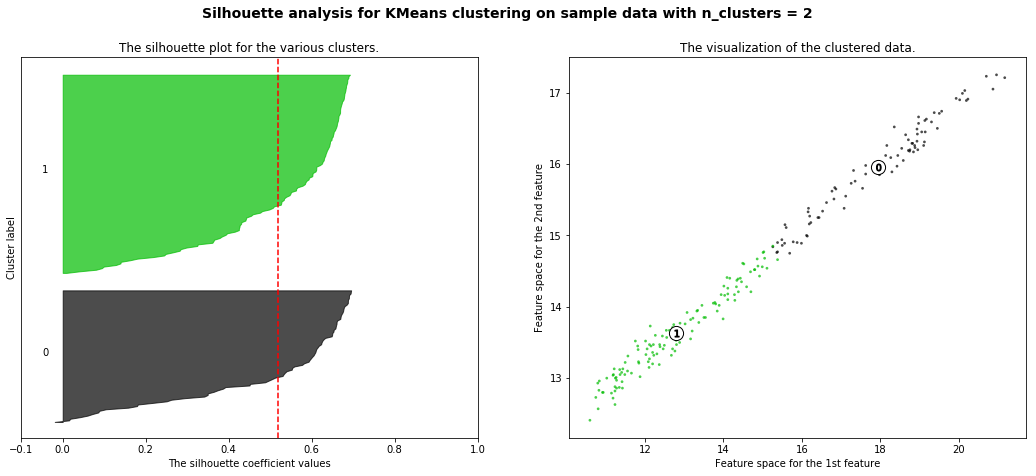

For n_clusters = 3 The average silhouette_score is : 0.4719337319126885


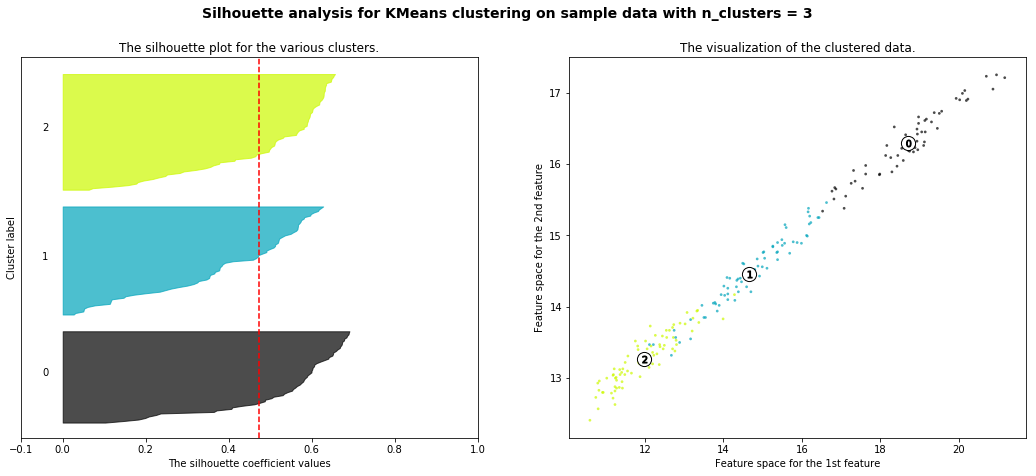

For n_clusters = 4 The average silhouette_score is : 0.3953600261389667


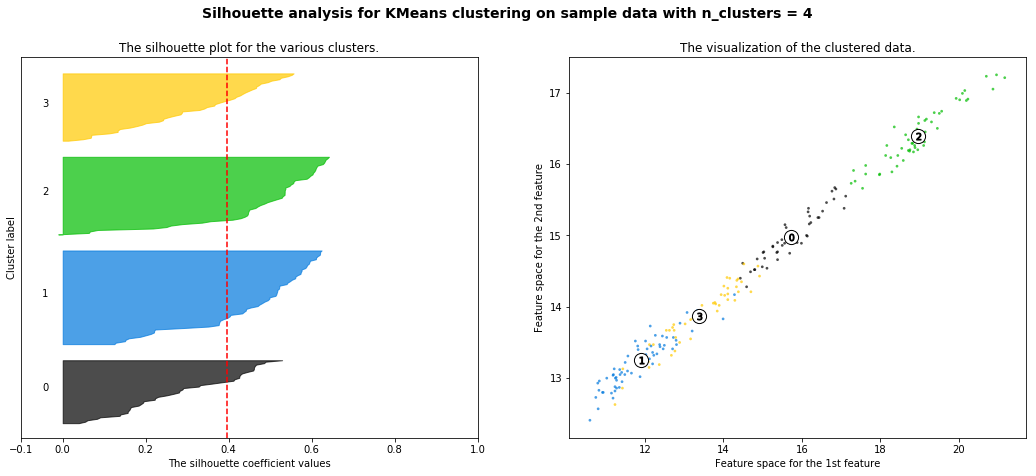

For n_clusters = 5 The average silhouette_score is : 0.360170558962535


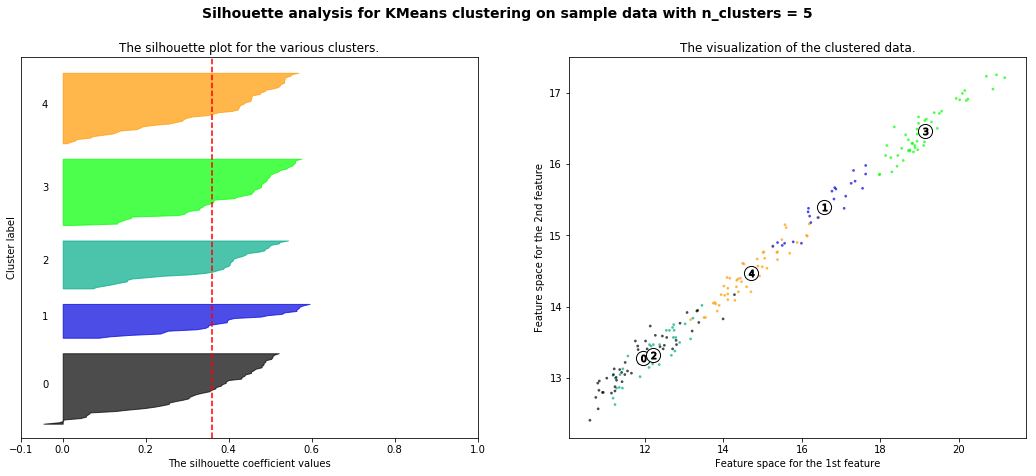

In [24]:
silhoutte_analysis(seed_X, range(2, 6))

## Hierarchical Clustering
(Two types, *Agglomerative* and *Divisive*). Going to look at agglomerative, which treats each observation as its own cluster. Using some metric, join the closest pairs. Repeat until one cluster. Can be slow! \begin{align}
O(n^3)
\end{align}

Tracks creation in a *dendrogram*. The left side of the dendrogram shows the distance. The taller the line, the less similar the clusters are (*dissimilarity*). One method for determining number cluster is to assume horizontal lines go out and make a horizontal cutoff below the tallest line. The number of lines it intersects is the number of clusters.


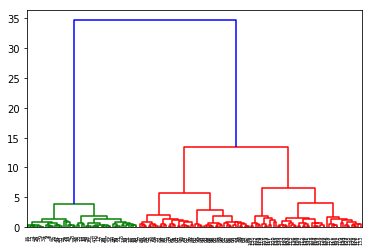

In [56]:
# ward clustering minimizes the sum of the squares in the clusters (like k-means)

dend = hierarchy.dendrogram(hierarchy.linkage(X, method='ward'))

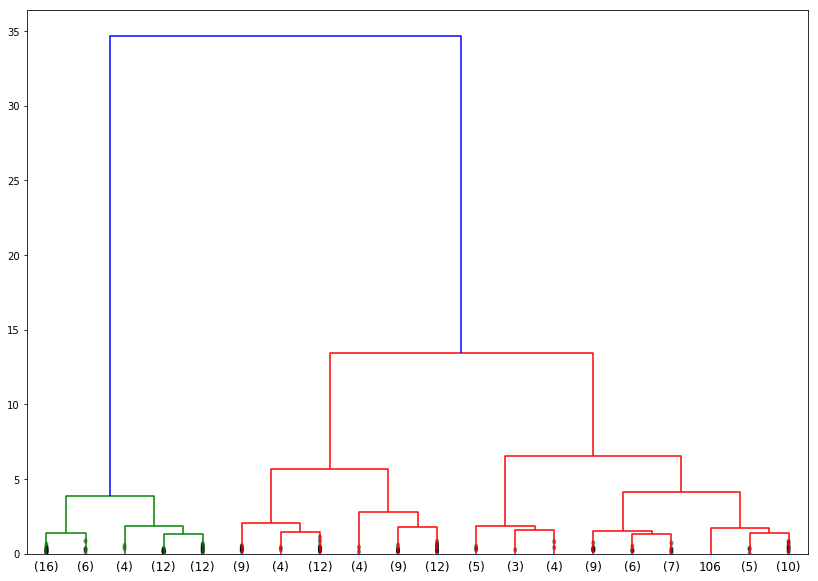

In [58]:
# leaf counts in brackets
fig = plt.figure(figsize=(14,10))
dend = hierarchy.dendrogram(
    hierarchy.linkage(X, method='ward'),
    truncate_mode='lastp',
    p=20,
    show_contracted=True) # shows density

In [59]:
hc = cluster.AgglomerativeClustering(n_clusters=3, affinity='euclidean',
                                    linkage='ward')
hc.fit_predict(X)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

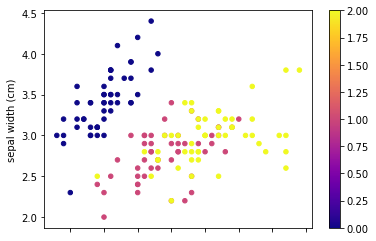

In [60]:
# Plot Actuals & compare to agg and kmeans
X.plot(kind='scatter', x='sepal length (cm)', y='sepal width (cm)',
          c=target, cmap='plasma')

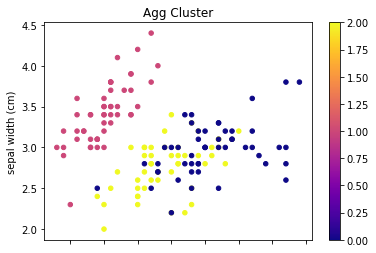

In [61]:
# Plot agglomerative clustering
pred = hc.fit_predict(X)
X.plot(title=f'Agg Cluster', kind='scatter', 
       x='sepal length (cm)', y='sepal width (cm)',
      c=pred, cmap='plasma')

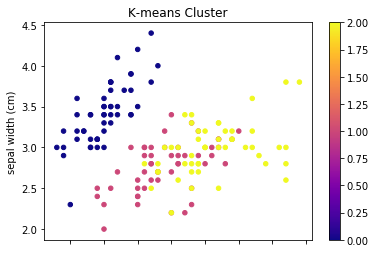

In [62]:
# vs k-means
k2 = cluster.KMeans(n_clusters=3)
pred = k2.fit_predict(X)
X.plot(title=f'K-means Cluster', kind='scatter', 
       x='sepal length (cm)', y='sepal width (cm)',
      c=pred, cmap='plasma')

## Exercise: Hierarchical Clustering 
* Plot a dendrogram for the seed data. Is there a logical cut point?

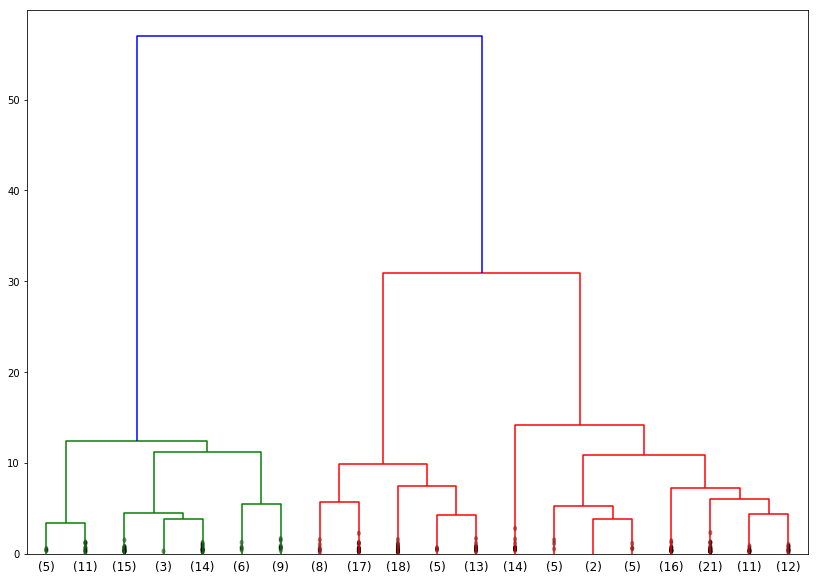

In [63]:
# leaf counts in brackets
fig = plt.figure(figsize=(14,10))
dend = hierarchy.dendrogram(
    hierarchy.linkage(seed_X, method='ward'),
    truncate_mode='lastp',
    p=20,
    show_contracted=True) # shows density